In [3]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["figure.dpi"] = 100

In [4]:
# Load the dataset
file_path = 'training_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


# High demand
The histograms shows the number of observed instances of high demand, given some variable in the x-axis.

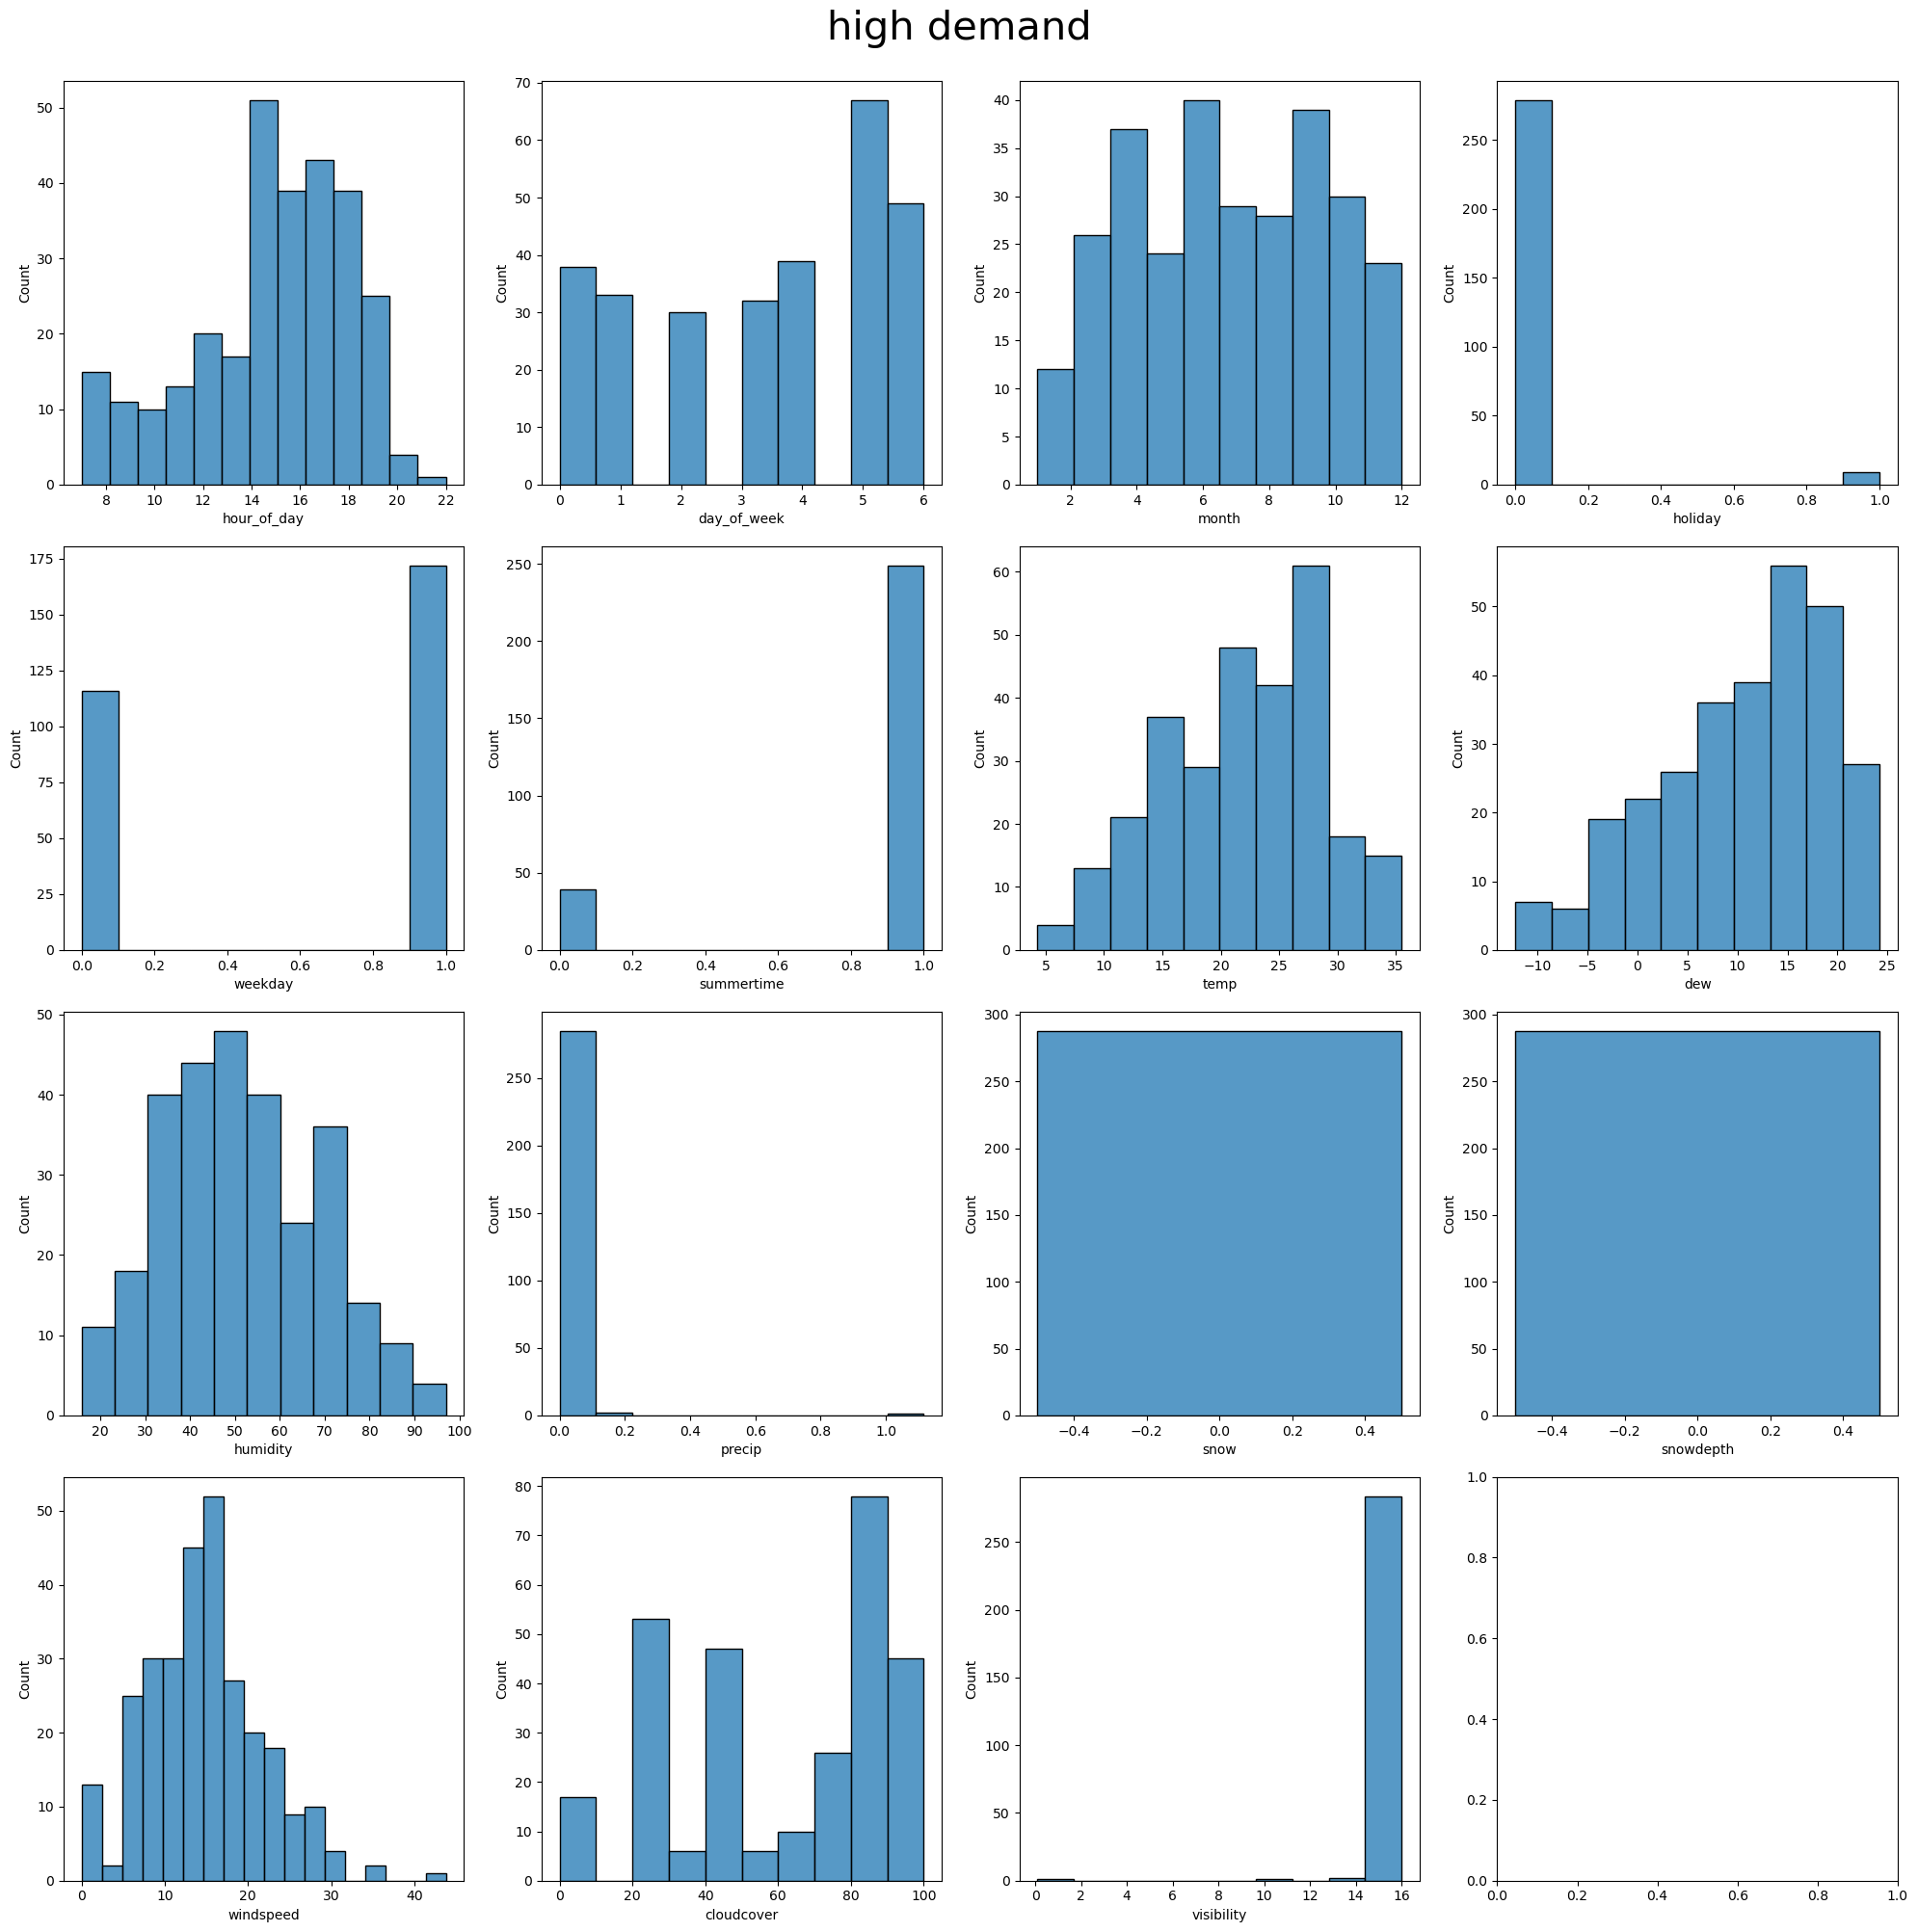

In [15]:
# Filtering the data for only high bike demand (binary label = 1)
high_demand_data = data[data['increase_stock_binary'] == 1]

# Plotting the distribution of each feature for high bike demand
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("high demand", y=1, fontsize=30)
for i, col in enumerate(high_demand_data.columns[:-2]): # excluding the last two columns (original and binary labels)
    sns.histplot(high_demand_data[col], bins="auto", ax=axes[i], kde=False)

plt.tight_layout()
plt.show()

# Low demand
The histograms shows the number of observed instances of low demand, given some variable in the x-axis.

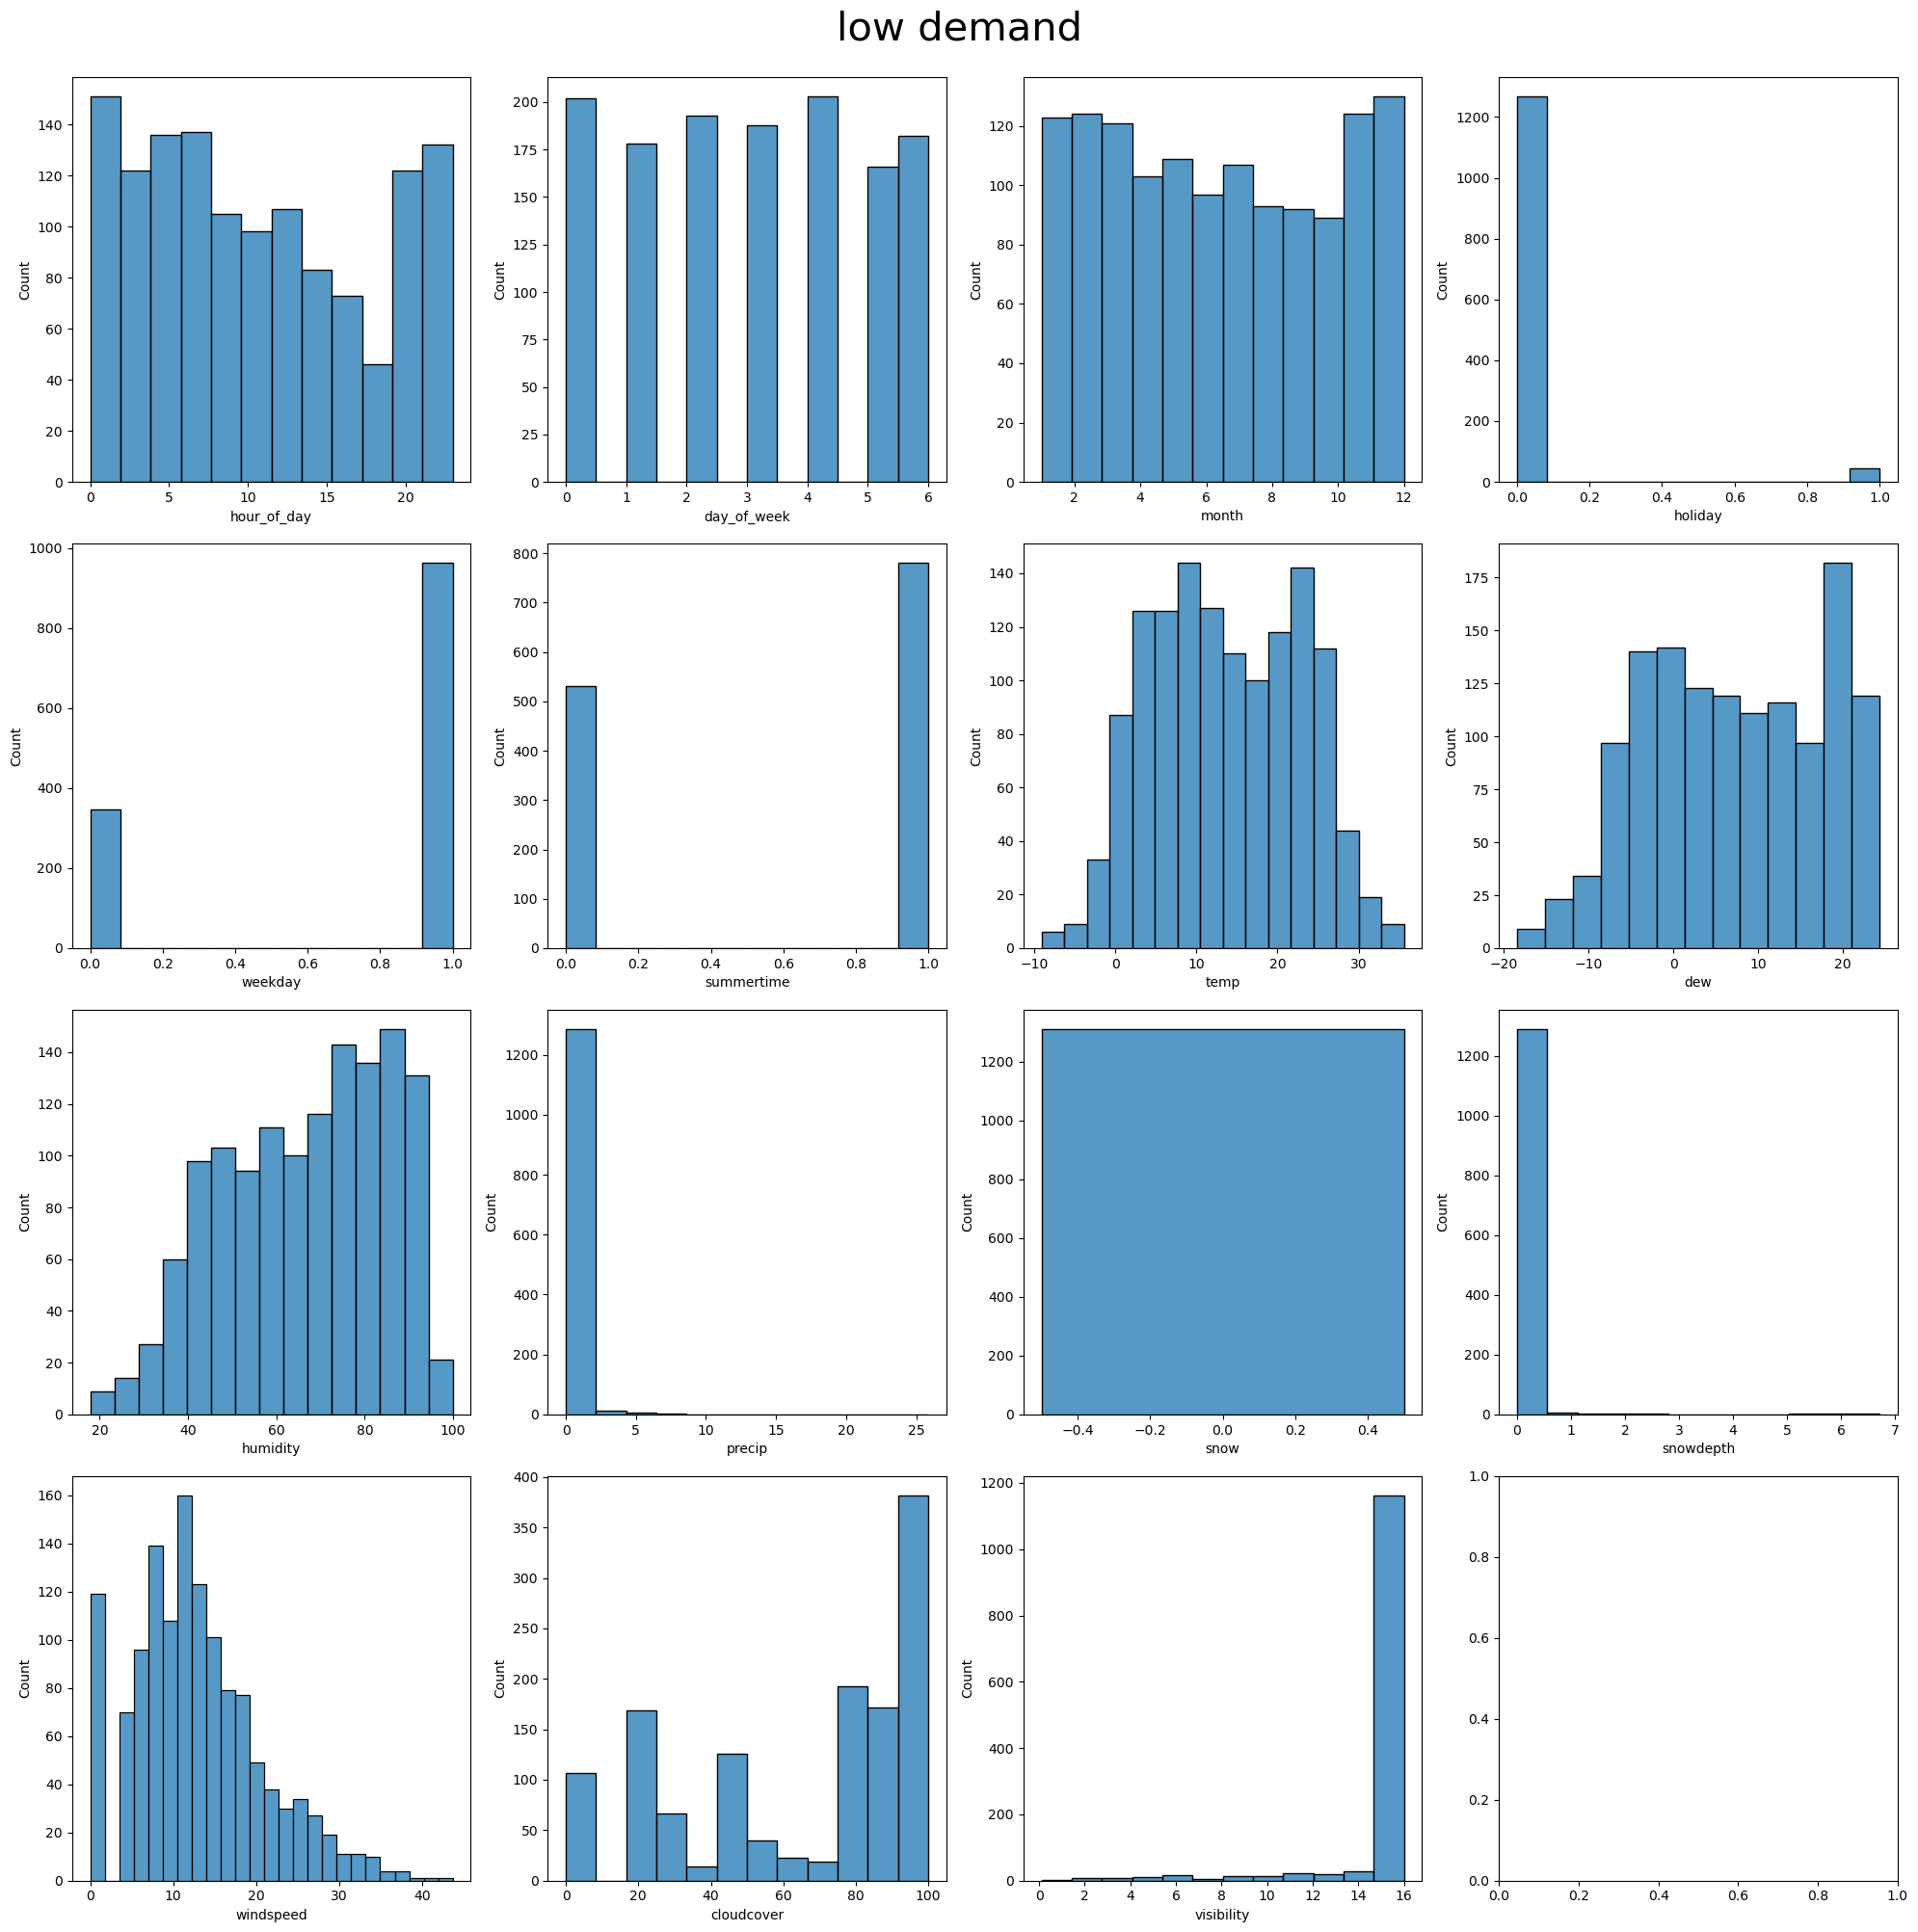

In [12]:
low_demand_data = data[data['increase_stock_binary'] == 0]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("low demand", y=1, fontsize=30)
for i, col in enumerate(low_demand_data.columns[:-2]): # excluding the last two columns (original and binary labels)
    sns.histplot(low_demand_data[col], bins="auto", ax=axes[i], kde=False)

plt.tight_layout()
plt.show()

# Plotting low and high demand together
1 = high demand \
0 = low demand

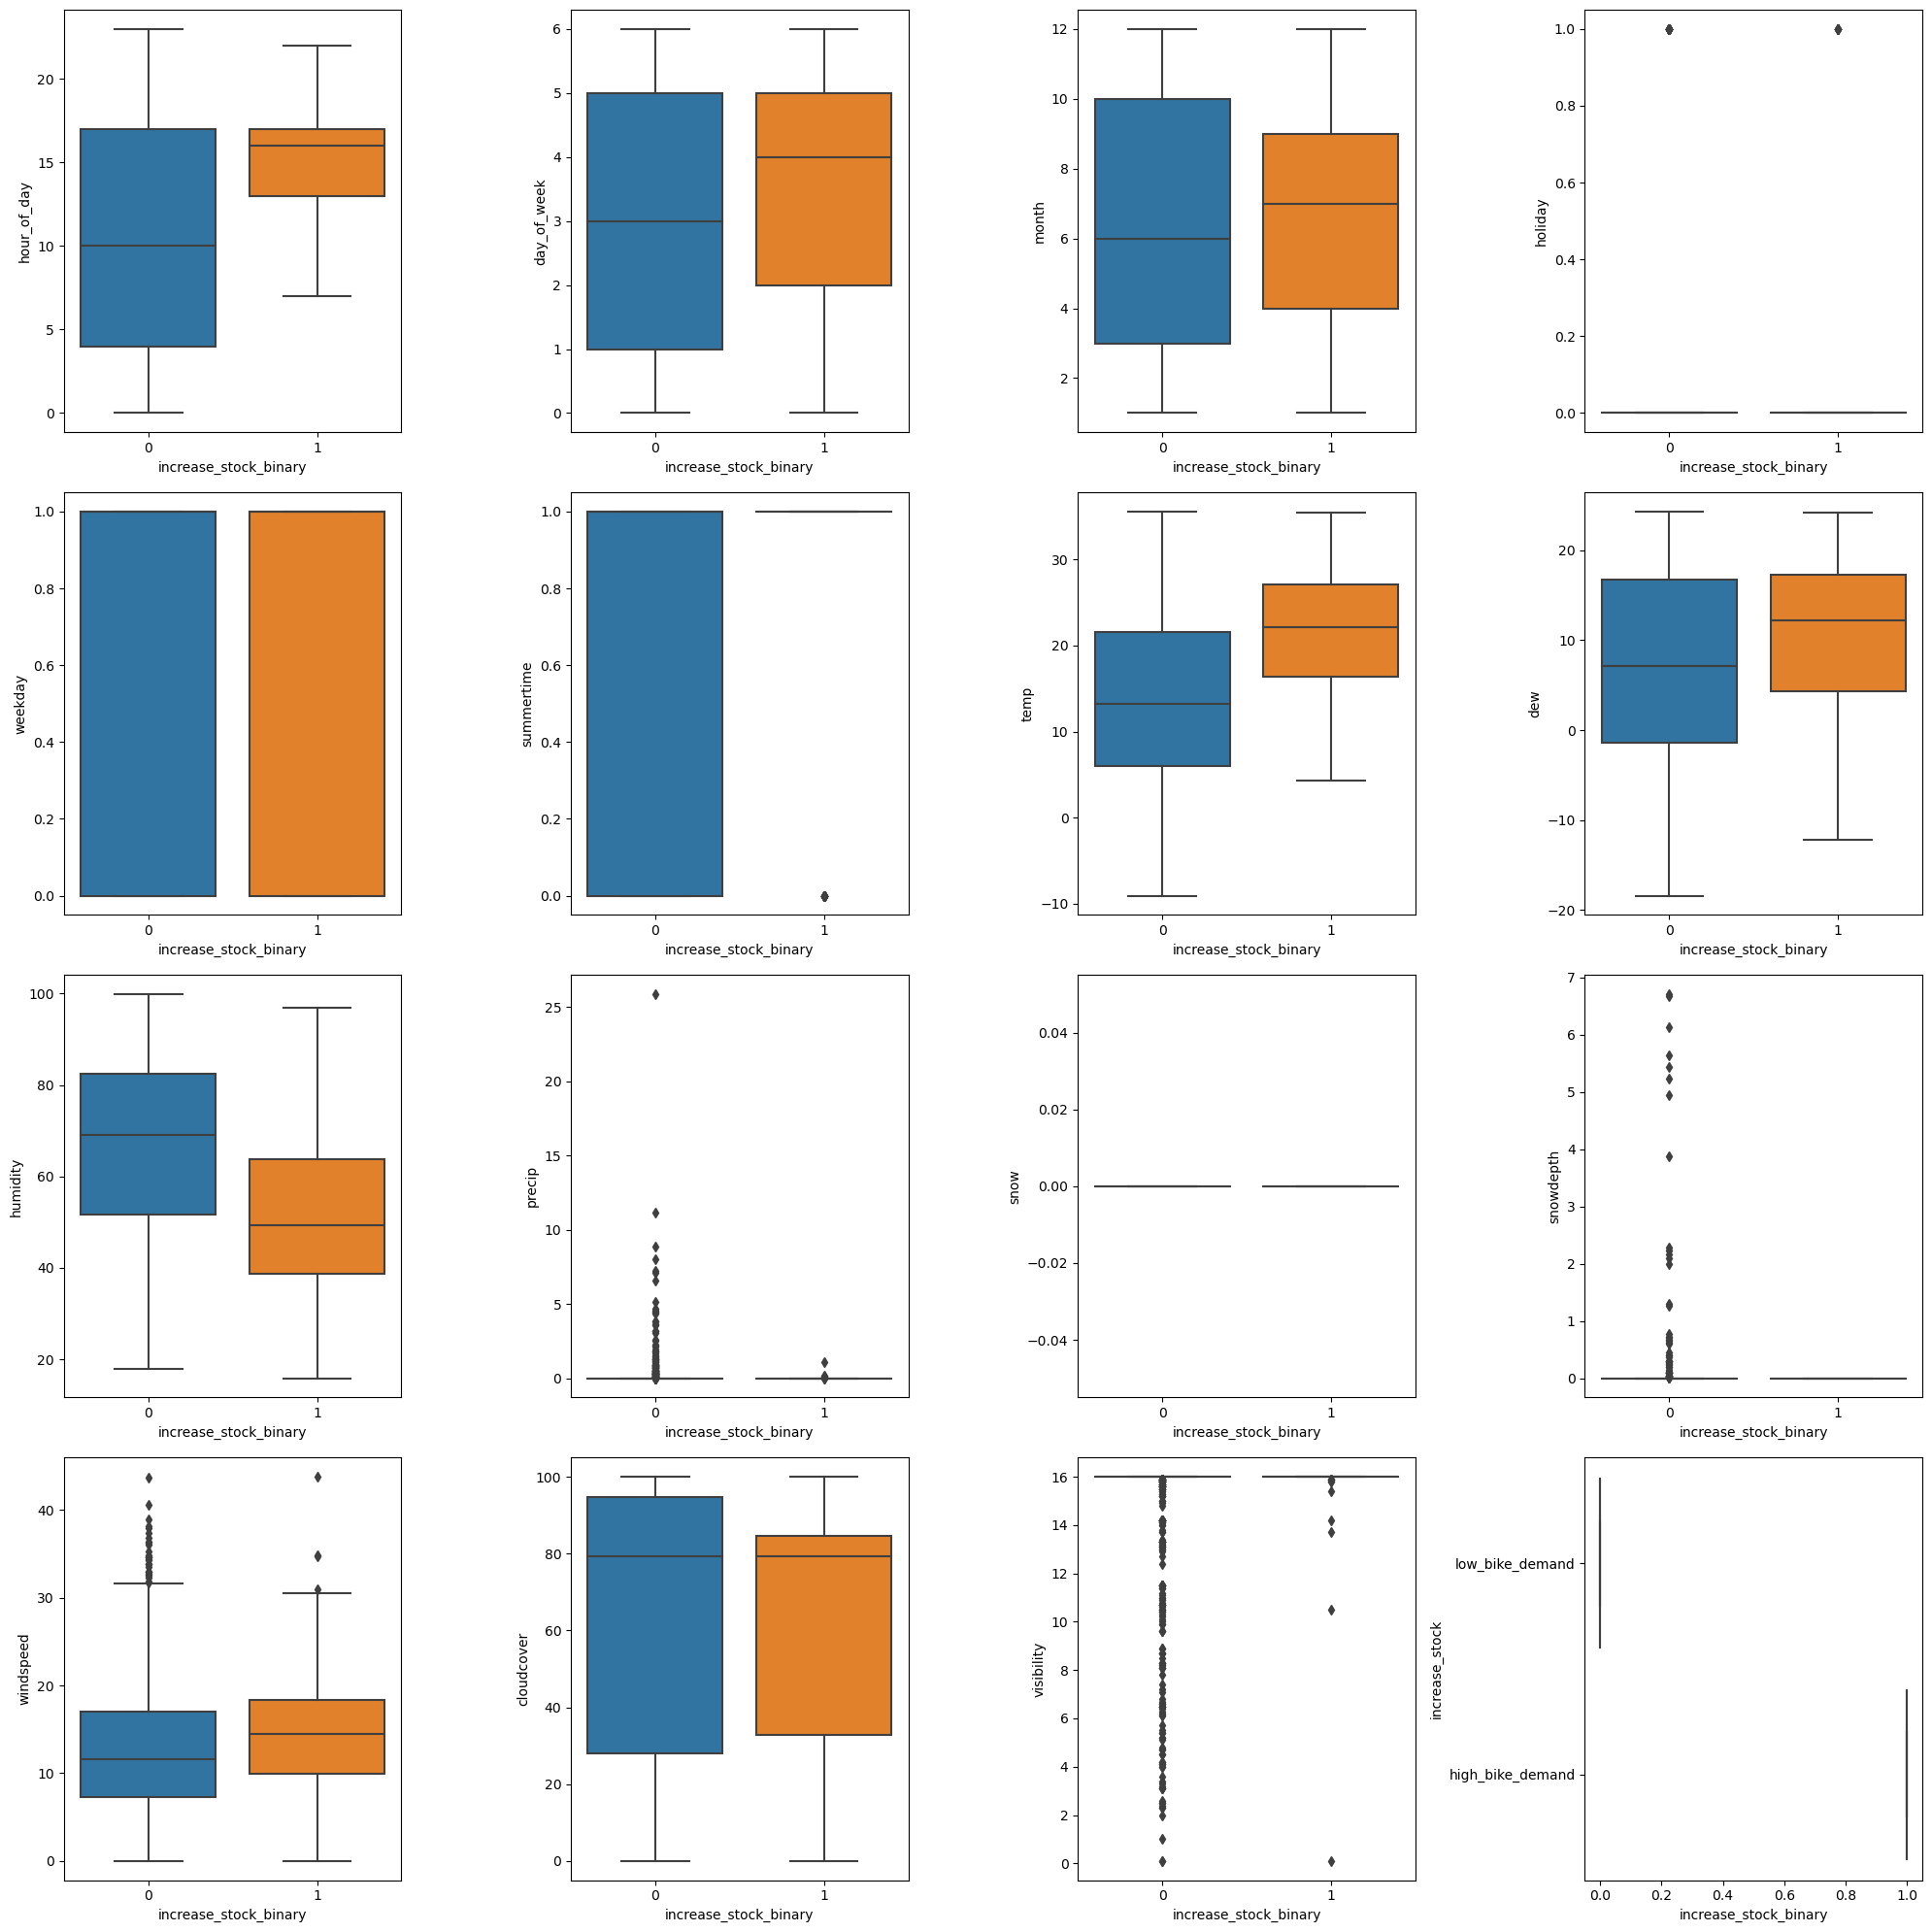

In [5]:
# Convert the 'increase_stock' column to binary for plotting, 
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# Plotting correlations between inputs and the binary label
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns[:-1]): # excluding the last column which is the binary label
    sns.boxplot(x='increase_stock_binary', y=col, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

## Observations
1. The increase for demand ishighest in the interval 15:00 - 19:00.
2. Friday is a high demand day.
3. The months has some influence. 
4. Demand is very high when it is not , but slightly higher 
5. 